# Prediction using Decision Tree Algorithm



*   The goal is to create the Decision Tree classifier and visualize it graphically
*   The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

***Author: Andrijana Zivic***



# Dataset

In [105]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [93]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
df.drop('Id', axis=1, inplace=True)

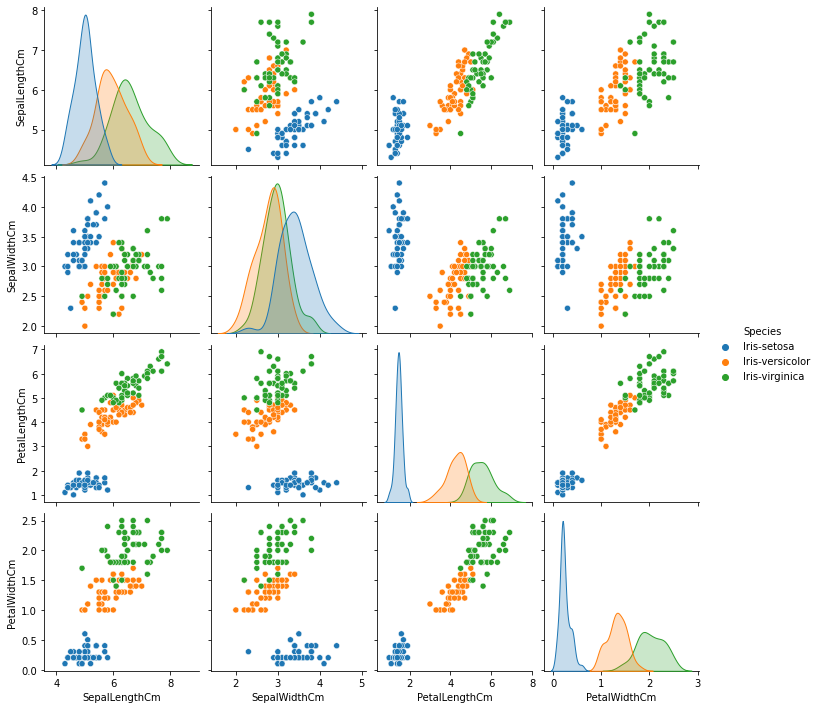

In [97]:
sns.pairplot(df, hue='Species' )

Here each row of the data refers to a single observed flower. This table layout makes clear that the information can be thought of as a 2D numerical array. The target array for this task is one dimensional, with length representing the number of rows of the matrix. The quantity we want to predict from the data is the dependent variable. For this Decision tree algorithm we need a model that can predict the species of flower based on the other measurements.

In [99]:
x = df.drop('Species', axis=1) #data
y = df.Species #target
y.shape

(150,)

In [159]:
#finding null values if there is any
x.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

With this data properly formatted its time to define the Decision Tree Algorithm. Here the decision variables are categorical so what should be used is classification tree.

The tree is going to be built through a process of binary recursive partitioning.

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(x, y, train_size=0.7, random_state=20)

# The algorithm

In [194]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtree.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [197]:
prediction= dtree.predict(X_test)

from sklearn.model_selection import cross_val_score

acc_score=cross_val_score(dtree, x, y, cv=3)
acc_score

array([0.96, 0.94, 0.98])

In [198]:
acc_score.mean()

0.96

# Visualizing

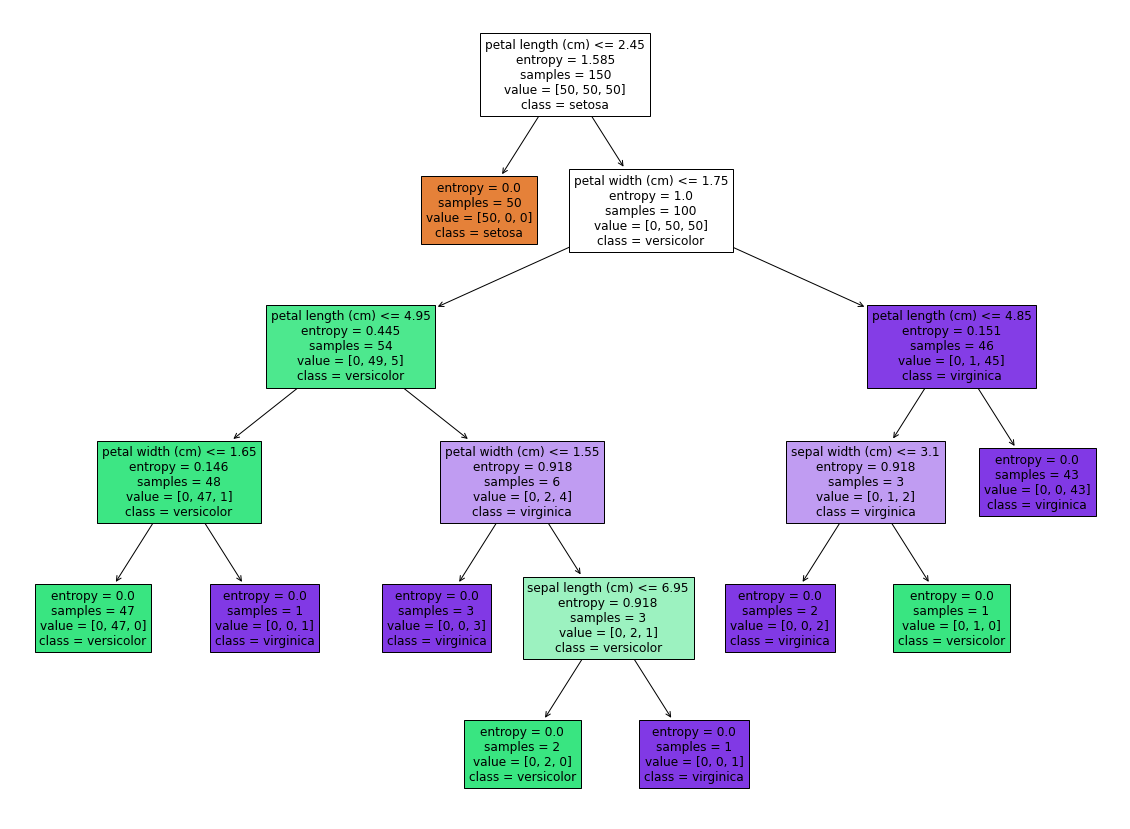

In [199]:
from sklearn import tree
fig = plt.figure(figsize=(20,15))
vis = tree.plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)


In the beginning, the whole training set is considered as the root. This Decision Tree follows DNF representation: every branch from the root of the tree to a leaf node having the same class is conjunction of values, different branches ending in that class form a disjunction.
The color of the leaf is coresponding to the predicted value.

In this case study, it has been observed that the model can predict the right class accordingly for new or test data with 96% accuracy. 
This model is not complex and it's understandable, so there is no need for pruning. 